In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline


In [2]:
###test data credentials




In [3]:
###train data credentials

In [6]:
#combining the datasets
fulldata = train.append(test, ignore_index=True)
print(fulldata.tail())

          id  label                                              tweet
49154  49155    NaN  thought factory: left-right polarisation! #tru...
49155  49156    NaN  feeling like a mermaid ð #hairflip #neverre...
49156  49157    NaN  #hillary #campaigned today in #ohio((omg)) &am...
49157  49158    NaN  happy, at work conference: right mindset leads...
49158  49159    NaN  my   song "so glad" free download!  #shoegaze ...


In [7]:
## removing the tweets which have @user in them.
def remove_pattern(input_txt, pattern): #with this function we remove @user in tweets.
    r = re.findall(pattern, input_txt) #findall function finds the patterns which are inside in tweets.
    #print(r)
    for i in r:
        input_txt = re.sub(i, '', input_txt) #this for loop changes @user expressions with space.
        print(input_txt)
        
    return input_txt    



In [26]:
# remove twitter handles (@user)
#we changes this function to vectorizating version.
fulldata['tidy_tweet'] = np.vectorize(remove_pattern)(fulldata['tweet'], "@[\w]*")

  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
  thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
  thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
  camping tomorrow        dannyâ¦
  camping tomorrow        dannyâ¦
  camping tomorrow        dannyâ¦
  camping tomorrow        dannyâ¦
  camping tomorrow        dannyâ¦
  camping tomorrow        dannyâ¦
  camping tomorrow        dannyâ¦
  camping tomorrow        dannyâ¦
   welcome here !  i'm   it's so #gr8 ! 
   welcome here !  i'm   it's so #gr8 ! 
 #cnn calls #michigan middle school 'build the wall' chant '' #tcot  
its #friday! ð smiles all around via ig user:  #cookies make people   
  lumpy says i am a . prove it lumpy.
  lumpy says i am a . prove it lum

0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can't use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
5        [2/2] huge fan fare and big talking before the...
6                         camping tomorrow        dannyâ¦
7        the next school year is the year for exams.ð...
8        we won!!! love the land!!! #allin #cavs #champ...
9                    welcome here !  i'm   it's so #gr8 ! 
10        â #ireland consumer price index (mom) climb...
11       we are so selfish. #orlando #standwithorlando ...
12       i get to see my daddy today!!   #80days #getti...
13        #cnn calls #michigan middle school 'build the...
14       no comment!  in #australia   #opkillingbay #se...
15       ouch...junior is angryð#got7 #junior #yugyo...
16       i am thankful for having a paner. #thankful #p.

In [9]:
# remove special characters, numbers, punctuations
fulldata['tidy_tweet'] = fulldata['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [10]:
# Removing Short Words
fulldata['tidy_tweet'] = fulldata['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [11]:
fulldata.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [12]:
#tokenization
#tokenization means splitting every words from the sentences.
tokenized_tweet = fulldata['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [13]:
#stemming
# Stemming means reducing the words derived from the same word to a single word by eliminating them separately.

from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [14]:
#with these cell we join the words from previous steps and change it from the tidy tweet part.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

fulldata['tidy_tweet'] = tokenized_tweet

In [15]:
!pip install wordcloud
#wordcloud is exploring text data and making your report more lively.It is an visual tool to see the words in text.

Requirement not upgraded as not directly required: wordcloud in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: numpy>=1.6.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wordcloud)
Requirement not upgraded as not directly required: pillow in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wordcloud)
Requirement not upgraded as not directly required: olefile in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pillow->wordcloud)


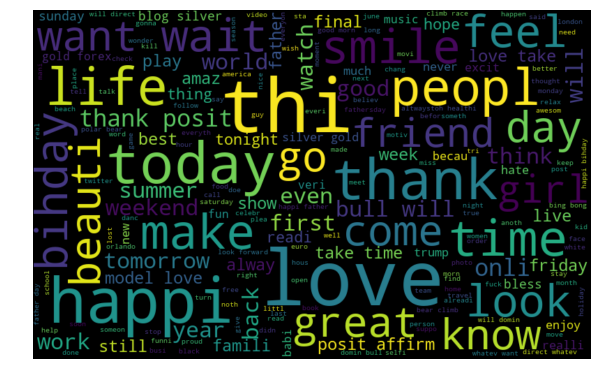

In [16]:
#wordcloud-Understanding the common words used in the tweets: WordCloud
all_words = ' '.join([text for text in fulldata['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

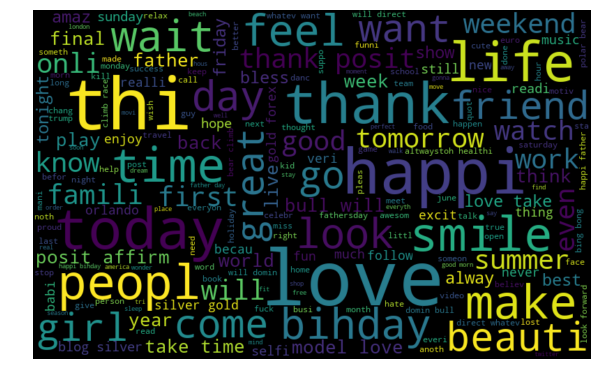

In [17]:
# Words in non racist/sexist tweets
normal_words =' '.join([text for text in fulldata['tidy_tweet'][fulldata['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

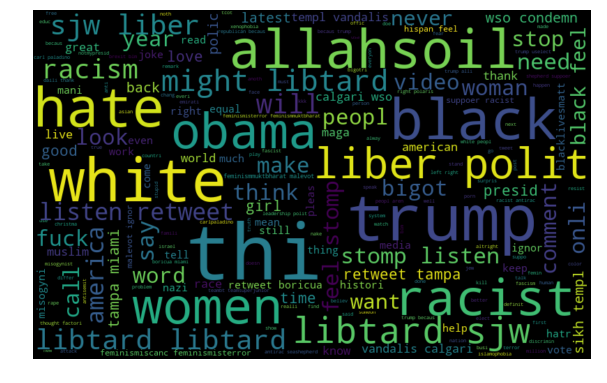

In [18]:
#Racist/Sexist Tweets
negative_words = ' '.join([text for text in fulldata['tidy_tweet'][fulldata['label'] == 1]])

wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
# function to collect hashtags-Understanding the impact of Hashtags on tweets sentiment
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i) #findall function finds the patterns which are inside in tweets.
        hashtags.append(ht)

    return hashtags

In [20]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(fulldata['tidy_tweet'][fulldata['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(fulldata['tidy_tweet'][fulldata['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


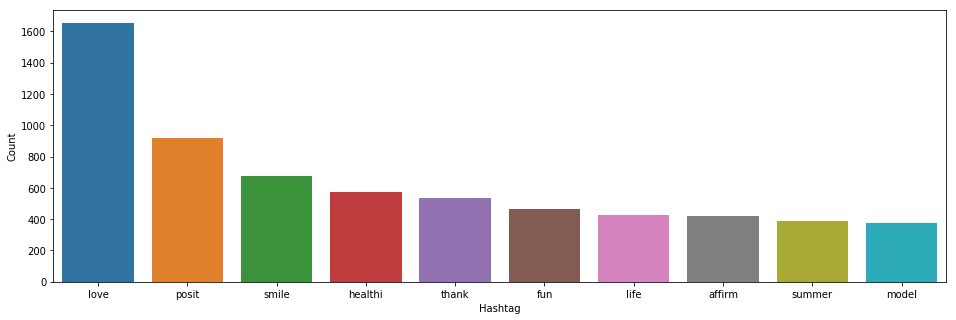

In [21]:
#Non-Racist/Sexist Tweets
a = nltk.FreqDist(HT_regular) #calculate the frequency of words
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


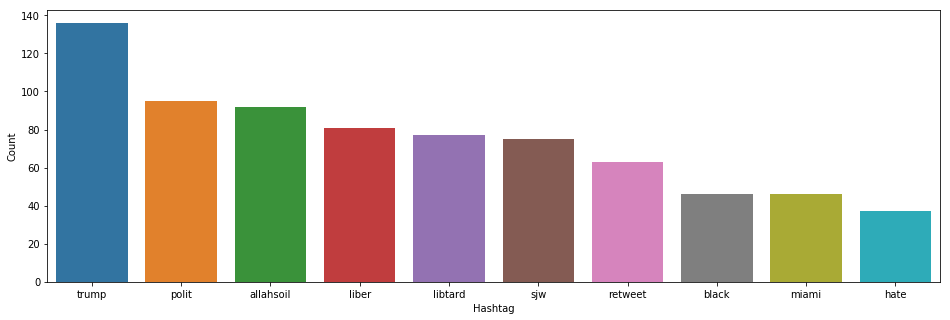

In [22]:
#racist sexist tweets 
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()